In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-dental-panoramic/model_unquant.tflite
/kaggle/input/dataset-dental-panoramic/dataset_dental_panoramic_new.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/dataset-dental-panoramic/dataset_dental_panoramic_new.csv')
df.head()

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,contrast_0,contrast_45,...,homogeneity_0,homogeneity_45,homogeneity_90,homogeneity_135,energy_0,energy_45,energy_90,energy_135,label,outcome
0,19.884957,23.628434,19.519652,23.194091,0.712565,0.610188,0.686368,0.617550,766.771525,1056.960758,...,0.063559,0.054000,0.075534,0.060143,0.011496,0.010841,0.012137,0.010958,periodontal49,1
1,12.197890,12.025688,7.984757,11.864389,0.823630,0.828481,0.909959,0.832809,429.741001,420.947294,...,0.122131,0.120837,0.163079,0.122156,0.017995,0.018026,0.022009,0.018134,periodontal12,1
2,11.824691,12.391509,8.946787,12.513753,0.866998,0.849095,0.895926,0.848822,405.565334,467.190689,...,0.139127,0.134268,0.184243,0.131141,0.021167,0.019726,0.024032,0.019566,periodontal39,1
3,11.334110,11.930227,8.843366,11.870590,0.888332,0.877955,0.918586,0.876252,341.202061,377.481397,...,0.128076,0.117555,0.153966,0.117807,0.015765,0.014892,0.017446,0.015061,periodontal23,1
4,19.132071,22.383088,20.537302,23.303743,0.842629,0.792929,0.809992,0.776107,676.340803,903.959158,...,0.057673,0.050900,0.063182,0.050951,0.010772,0.010155,0.010630,0.010090,periodontal15,1


In [5]:
df.columns

Index(['dissimilarity_0', 'dissimilarity_45', 'dissimilarity_90',
       'dissimilarity_135', 'correlation_0', 'correlation_45',
       'correlation_90', 'correlation_135', 'contrast_0', 'contrast_45',
       'contrast_90', 'contrast_135', 'homogeneity_0', 'homogeneity_45',
       'homogeneity_90', 'homogeneity_135', 'energy_0', 'energy_45',
       'energy_90', 'energy_135', 'label', 'outcome'],
      dtype='object')

In [6]:
# Check for nulls
print(df.isnull().sum())

dissimilarity_0      0
dissimilarity_45     0
dissimilarity_90     0
dissimilarity_135    0
correlation_0        0
correlation_45       0
correlation_90       0
correlation_135      0
contrast_0           0
contrast_45          0
contrast_90          0
contrast_135         0
homogeneity_0        0
homogeneity_45       0
homogeneity_90       0
homogeneity_135      0
energy_0             0
energy_45            0
energy_90            0
energy_135           0
label                0
outcome              0
dtype: int64


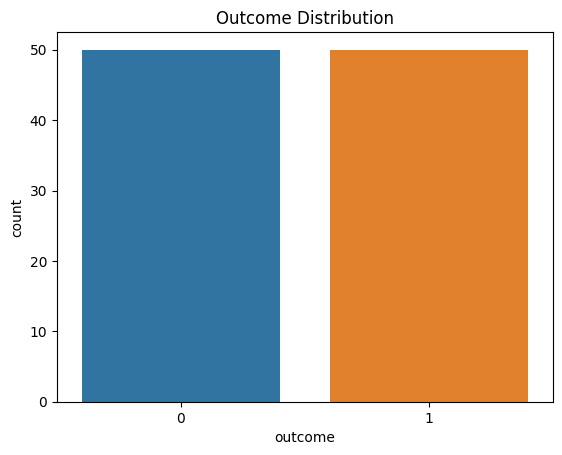

In [7]:
# Outcome class distribution
sns.countplot(data=df, x='outcome')
plt.title('Outcome Distribution')
plt.show()

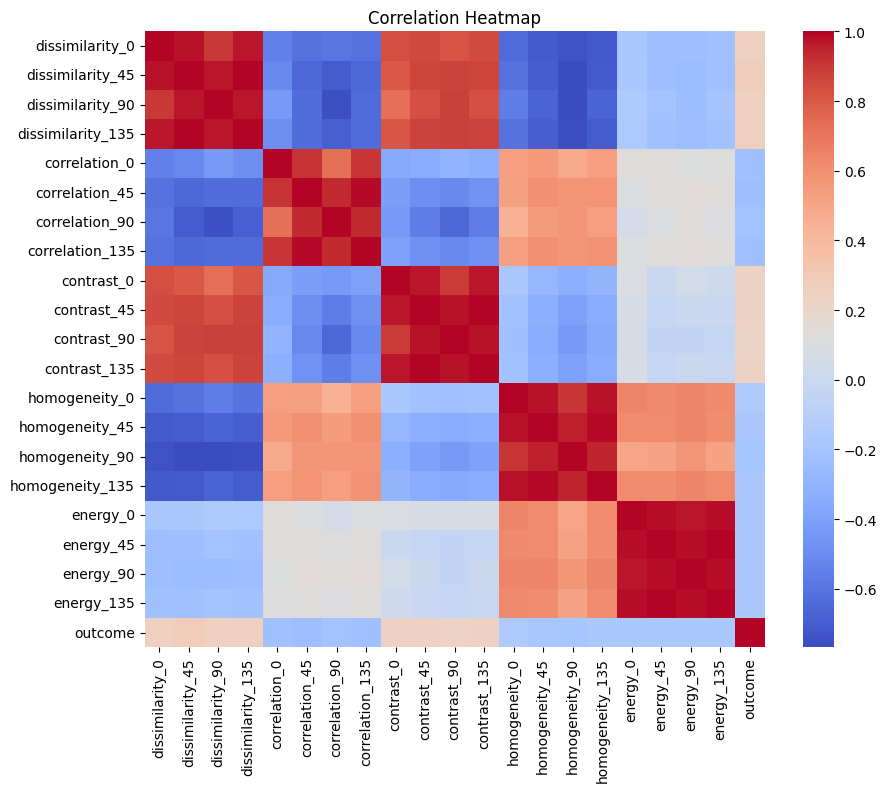

In [8]:
# Select only numeric columns to avoid string conversion errors
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop 'label' column as it's not needed for prediction
X = df.drop(['outcome', 'label'], axis=1)
y = df['outcome']

In [10]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Try 3 models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")

Random Forest Accuracy: 0.5500
Logistic Regression Accuracy: 0.5500
SVM Accuracy: 0.6000


In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Use the best model (e.g., Random Forest)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
# Detailed report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.70      0.58      0.64        12

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.62      0.60      0.60        20



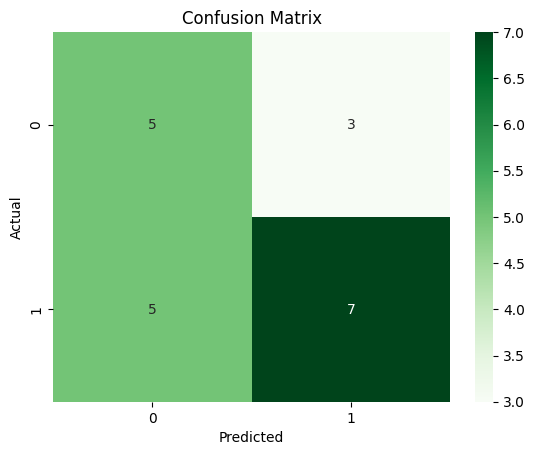

In [14]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()